# WeatherPy
----

### Analysis
* 

---



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [19]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []
name = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        name.append(response["name"])

    except:
        continue



In [20]:
# response
print(len(cloudiness))

555


In [21]:
#dataframe with all of the data
city_frames = {"Lat": lat,
             "Temp": temp,
             "Humidity": humidity,
             "Cloudiness": cloudiness,
             "Windspeed": windspeed
              }
city_weather = pd.DataFrame(city_frames)


#Export data to CSV
city_weather.to_csv('city_weather_data.csv')

city_weather.head()
                        

,Lat,Temp,Humidity,Cloudiness,Windspeed
0,-38.31,20.81,75,88,3.31
1,15.34,17.00,51,0,2.60
2,15.46,9.16,50,0,2.71
3,-53.16,13.00,66,75,3.60
4,51.38,-10.00,85,90,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#Compare by temp
plt.scatter(lat,temp,c ='r', label='Temp F')
plt.legend(loc='lower left')
plt.title('Temperatur VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temp in F')
plt.savefig('Graph_Images/temp.png')
plt.show()


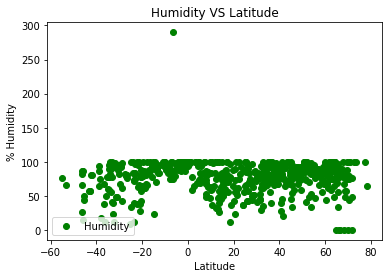

In [27]:
#Compare by humidity
plt.scatter(lat,humidity,c ='g', label='Humidity')
plt.legend(loc='lower left')
plt.title('Humidity VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.savefig('../Images/humidity.png')
plt.show()

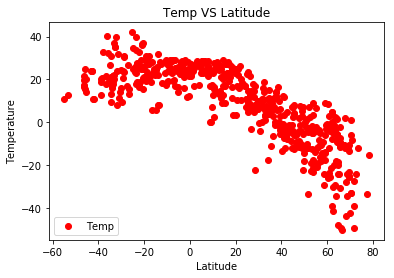

In [30]:
#Compare by temp
plt.scatter(lat,temp,c ='r', label='Temp')
plt.legend(loc='lower left')
plt.title('Temp VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Images/temp.png')
plt.show()

#### Latitude vs. Cloudiness Plot

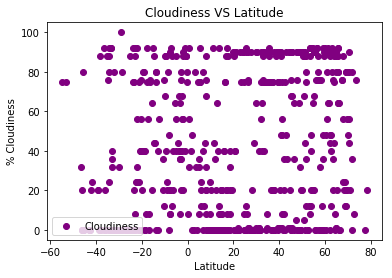

In [26]:
#Compare by Cloudiness
plt.scatter(lat,cloudiness,c ='purple', label='Cloudiness')
plt.legend(loc='lower left')
plt.title('Cloudiness VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.savefig('../Images/cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

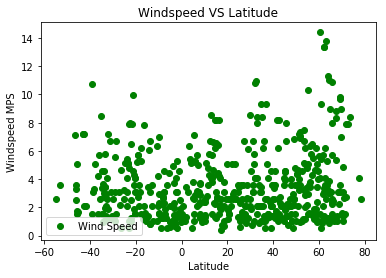

In [25]:
#Compare by Windspeed
plt.scatter(lat,windspeed,c ='g', label='Wind Speed')
plt.legend(loc='lower left')
plt.title('Windspeed VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed MPS')
plt.savefig('../Images/windspeed.png')
plt.show()
